In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from geneview import venn


In [3]:
from itertools import chain

def get_labels(data, fill=["number"]):
    """
    get a dict of labels for groups in data

    @type data: list[Iterable]
    @rtype: dict[str, str]

    input
      data: data to get label for
      fill: ["number"|"logic"|"percent"]

    return
      labels: a dict of labels for different sets

    example:
    In [12]: get_labels([range(10), range(5,15), range(3,8)], fill=["number"])
    Out[12]:
    {'001': '0',
     '010': '5',
     '011': '0',
     '100': '3',
     '101': '2',
     '110': '2',
     '111': '3'}
    """

    N = len(data)

    sets_data = [set(data[i]) for i in range(N)]  # sets for separate groups
    s_all = set(chain(*data))                     # union of all sets

    # bin(3) --> '0b11', so bin(3).split('0b')[-1] will remove "0b"
    set_collections = {}
    for n in range(1, 2**N):
        key = bin(n).split('0b')[-1].zfill(N)
        value = s_all
        sets_for_intersection = [sets_data[i] for i in range(N) if  key[i] == '1']
        sets_for_difference = [sets_data[i] for i in range(N) if  key[i] == '0']
        for s in sets_for_intersection:
            value = value & s
        for s in sets_for_difference:
            value = value - s
        set_collections[key] = value

    labels = {k: "" for k in set_collections}
    if "logic" in fill:
        for k in set_collections:
            labels[k] = k + ": "
    if "number" in fill:
        for k in set_collections:
            labels[k] += str(len(set_collections[k]))
    if "percent" in fill:
        data_size = len(s_all)
        for k in set_collections:
            labels[k] += "(%.1f%%)" % (100.0 * len(set_collections[k]) / data_size)

    return labels

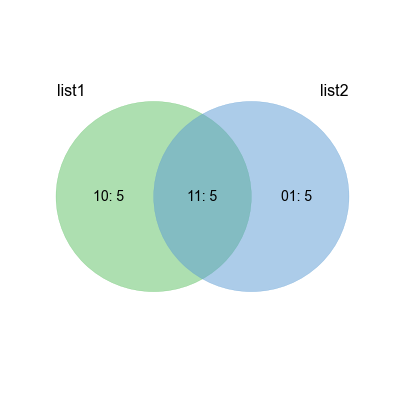

In [10]:
labels = get_labels([ range(10), range(5, 15)], fill=['number', 'logic'])
f, ax = plt.subplots(figsize=(7, 7))
ax = venn(labels, dataset_labels=['list1', 'list2'])


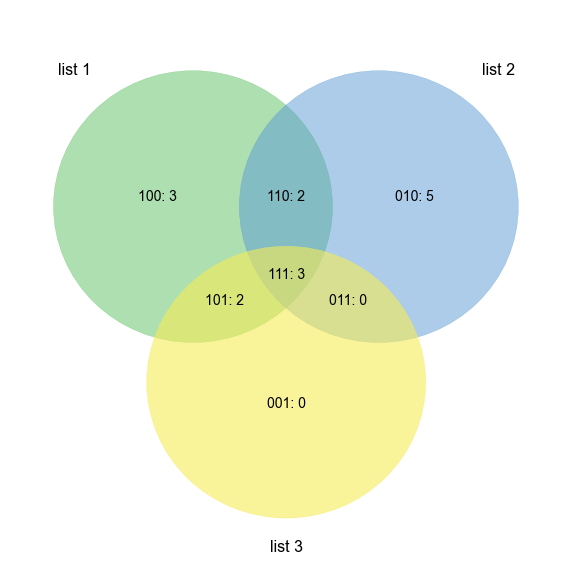

In [6]:
labels = get_labels([range(10), range(5, 15), range(3, 8)], fill=['number', 'logic'])
f, ax = plt.subplots(figsize=(10, 10))
ax = venn(labels, dataset_labels=['list 1', 'list 2', 'list 3'], ax=ax)


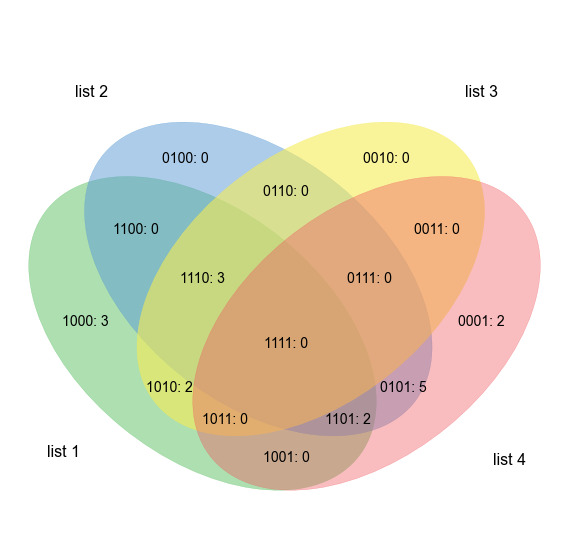

In [7]:
labels = get_labels([range(10), range(5, 15), range(3, 8), range(8, 17)], fill=['number', 'logic'])
f, ax = plt.subplots(figsize=(10, 10))
ax = venn(labels, dataset_labels=['list 1', 'list 2', 'list 3', 'list 4'], ax=ax)


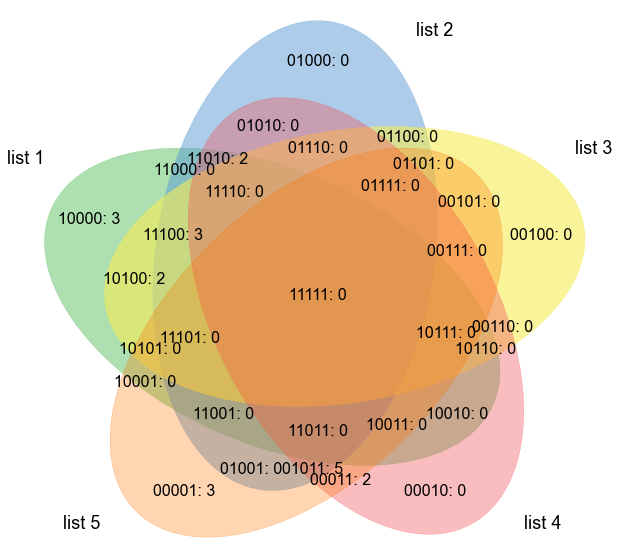

In [8]:
labels = get_labels([range(10), range(5, 15), range(3, 8), range(8, 17), range(10, 20)], fill=['number', 'logic'])
f, ax = plt.subplots(figsize=(10, 10))
ax = venn(labels, dataset_labels=['list 1', 'list 2', 'list 3', 'list 4', 'list 5'], fontsize=16, ax=ax)


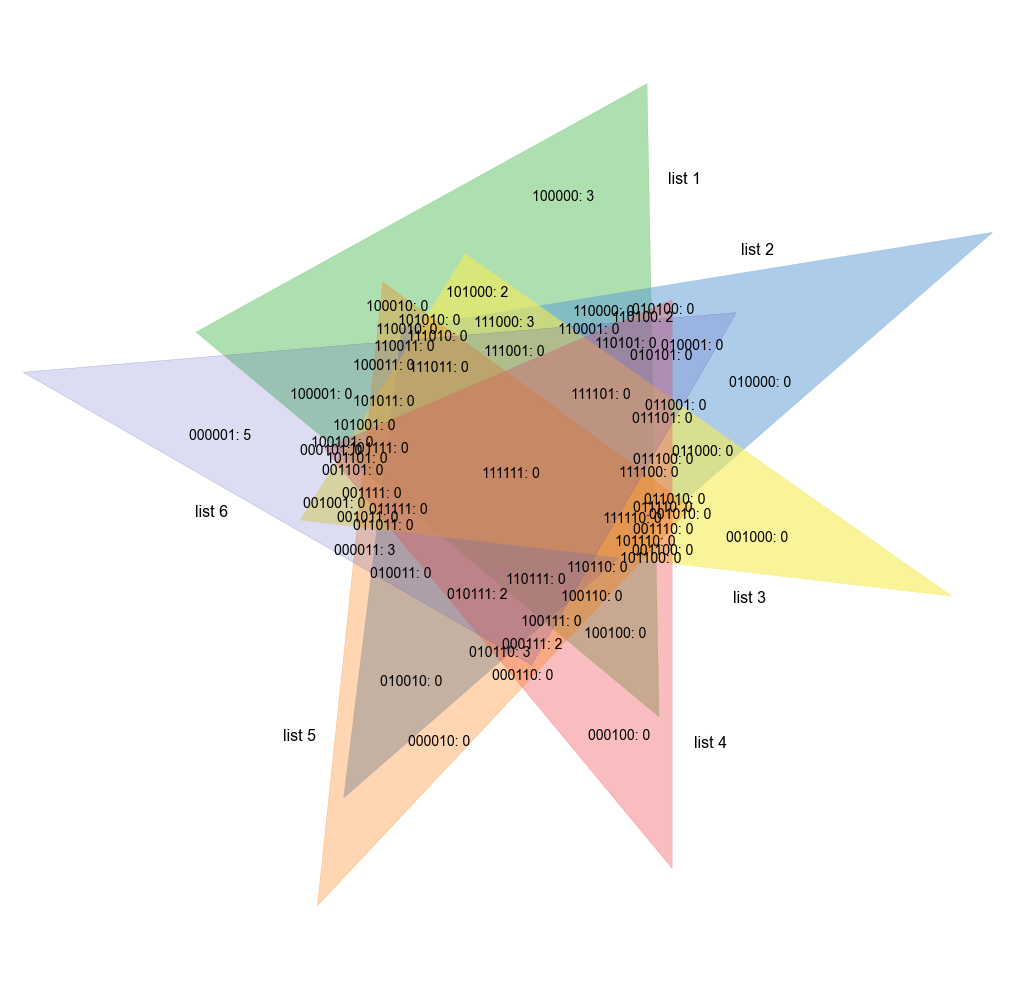

In [9]:
labels = get_labels([range(10), range(5, 15), range(3, 8), range(8, 17), range(10, 20), range(13, 25)], fill=['number', 'logic'])

f, ax = plt.subplots(figsize=(18, 18))
ax = venn(labels, dataset_labels=['list 1', 'list 2', 'list 3', 'list 4', 'list 5', 'list 6'], ax=ax)

